# Step6 演習03 SVMとその利用
---

Step6ではscikit-learnを用いてSVMの実装を行います。

scikit-learnのSVMは台湾大学が開発しているLIBSVMのラッパーとして実装されています。

LIBSVMはとても著名なライブラリーです。

Python以外の言語でSVMを用いるときも必ずと言ってよいほどお世話になるでしょう。

また、カーネル法を用いない素のSVMのことを線形SVMと呼ぶのでした。ほぼ線形分離可能であるように見えるサンプルデータを作成し、それを用いて学習させてみます。


**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 線形SVMの実装を行う。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learnチュートリアル sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) 

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## ガウシアンカーネルのパラメータの自動選択

ガウシアンカーネルのパラメータ$\gamma$はscikit-learnの場合デフォルトでは`auto`になっています。これは状況に応じた最適な値をきめ細やかに自動で選んでくれるわけではなく、特徴の数の逆数を$\gamma$の値として利用するだけです。

新たなデータ集合を今から生成します。今回は10000個のデータを生成します。Step6で学んだことを思い出しながら、このデータに対して適切なパラメータ(`C`と`gamma`)を自動選択するコードを実装して下さい。

### データ集合3の生成

In [2]:
if os.path.isfile("./dataStep6/dataStep6_3.csv") == True:
    data = np.loadtxt("./dataStep6/dataStep6_3.csv", delimiter = ",")
    Xraw = data[:,0:2]  # X.shapeは(100, 2)
    yraw = data[:,2] #y.shapeは(100, ) 1-dimのndarrayにしておく（縦ベクトルにならないこと注意）

else:
    Xraw, yraw = datasets.make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y=0.02)
    np.savetxt("./dataStep6/dataStep6_3.csv", np.c_[Xraw, yraw], delimiter=",", fmt="%f,%f,%d")

上のセルを実行したことによりデータセットを "data" に格納しました。下のセルを実行して、dataのshapeを確認しましょう。

In [3]:
data.shape

(10000, 3)

(10000,3)と表示されたはずです。
<br>
<br>
このデータセットは、10000行3列の行列が格納されています。Xにdataの2列目までのデータセットを格納し、yにdataの3列目のデータを格納しています。下のセルを実行して、格納したdataの中身の一部分を確認してみましょう。

In [4]:
data[:5]

array([[-1.559865,  0.617924,  1.      ],
       [-0.955785,  1.071159,  1.      ],
       [ 0.523327,  1.451054,  0.      ],
       [-0.402752,  1.472911,  1.      ],
       [ 0.154214,  1.972458,  0.      ]])

In [5]:
data[:5,0][:,np.newaxis]

array([[-1.559865],
       [-0.955785],
       [ 0.523327],
       [-0.402752],
       [ 0.154214]])

In [6]:
data[:5,1][:,np.newaxis]

array([[0.617924],
       [1.071159],
       [1.451054],
       [1.472911],
       [1.972458]])

In [7]:
data[:5,2][:,np.newaxis]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]])

dataの中身を訓練データ Xraw と目標変数 yraw にわけました。** Xraw **と ** yraw ** のデータを改めてshapeで確認しておきましょう。

In [8]:
Xraw.shape

(10000, 2)

In [9]:
yraw.shape

(10000,)

### 交差検証集合・テスト集合をとっておく

**【課題３】** 元データを訓練集合(X, y)、交差検証集合(Xval, yval)、テスト集合(Xtest, ytest)に分離して下さい。

In [10]:
#Coursemale-02 Step6 QuestionNumber3 2d71d2a24402c75eccb5ff124abc4d6d
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
m_raw, n_raw = Xraw.shape

X = Xraw[:m_raw*3//5, :]
y = yraw[:m_raw*3//5]
Xval = Xraw[m_raw*3//5:m_raw*4//5,:]
yval = yraw[m_raw*3//5:m_raw*4//5]
Xtest = Xraw[m_raw*4//5:,:]
ytest = yraw[m_raw*4//5:]
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [13]:
%%bash
./validation_client.py male-02 6 3 Step6_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



## データセットの視覚化

### 視覚化

Step6_01, Step6_02の課題１で実装した関数がそのまま使えます。

In [14]:
def plotData(X, y):
    pos = (y == 1)
    neg = (y == 0)

    plt.hold(True)
    plt.scatter(X[pos,0], X[pos,1], marker='+')
    plt.scatter(X[neg,0], X[neg,1], marker='o')
    
    plt.xlim(X[:,0].min(),X[:,0].max())
    plt.ylim(X[:,1].min(),X[:,1].max())

    plt.draw()

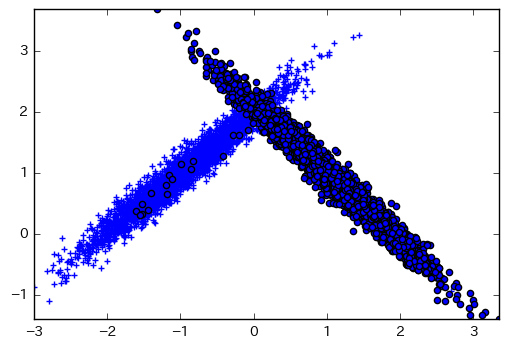

In [15]:
plotData(X, y)

### 適切なパラメータの自動選択

**【課題４】** 当該データに対して適切な`C`と`gamma`を選択する関数`chooseParams(X, y, Xval, yval)`を自由に実装して下さい。返値は、最適なパラメータ `C`および`gamma`とします。

In [22]:
#Coursemale-02 Step6 QuestionNumber4 02e47b2ce407f8462c20e9cf64f554db
def chooseParams(X, y, Xval, yval):
    # およそ10^(1/2)倍程度シフトしながら各パラメータに対して8件ずつ調査する
    values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

    C_values = values
    gamma_values = 1/ (2* (values**2))

###############ここを穴埋めしてください###############
    # 念のため訓練集合をシャッフルする。
    m = X.shape[0]
    idx = np.random.permutation(m) 
######################################################

    # forで片っ端からCとgammaを変えていく
    scores_val = np.empty([C_values.shape[0],gamma_values.shape[0]])
    for i_C in range(8):
        for i_gamma in range(8):
            # 大雑把に見ているだけなので、tolはかなり大きめに
            estimator = svm.SVC(C=C_values[i_C], kernel='rbf', tol=2e-1, gamma=gamma_values[i_gamma])
            
            # 学習させるデータはとりあえず訓練集合全体の1/2程度にして高速化する。
            estimator.fit(X[idx[:m//2]], y[idx[:m//2]])
            
            scores_val[i_C, i_gamma] = estimator.score(Xval, yval)

###############ここを穴埋めしてください###############
    # score_valの要素の中で最大のものが格納されている位置をmax_idxに返す
    max_idx = np.unravel_index(scores_val.argmax(), scores_val.shape)

    C = C_values[max_idx[0]]
    gamma = gamma_values[max_idx[1]]
######################################################
    return [C, gamma]

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [23]:
%%bash
./validation_client.py male-02 6 4 Step6_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [24]:
C, gamma = chooseParams(X, y, Xval, yval)

### 学習

得られた`C`と`gamma`を用いて学習させます。

In [25]:
estimator = svm.SVC(C=C, kernel='rbf', gamma=gamma)

In [26]:
estimator.fit(X, y)

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5.555555555555555,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 視覚化

その結果を視覚化します。

In [27]:
def visualizeBoundary(X, y, estimator):
    plotData(X, y)
    plt.hold(True)

    # タテヨコ300x300個を決定境界を引くサンプルにします
    sample_num = 300
    
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), sample_num)
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), sample_num)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    # それぞれのサンプルに関して予測値を計算
    vals = np.array([estimator.predict(np.column_stack((X1[:, i], X2[:, i]))) for i in range(X1.shape[1])]).T

#    #内包表記を使わないと以下のようになる
#    vals = np.empty(X1.shape)
#    for i in range(X1.shape[1]):
#        this_X = np.column_stack((X1[:, i], X2[:, i]))
#        vals[:, i] = estimator.predict(this_X)

    #等高線を使って予測値が0である地点と1である地点の境界をプロット
    plt.contour(X1, X2, vals)
    plt.show()

/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


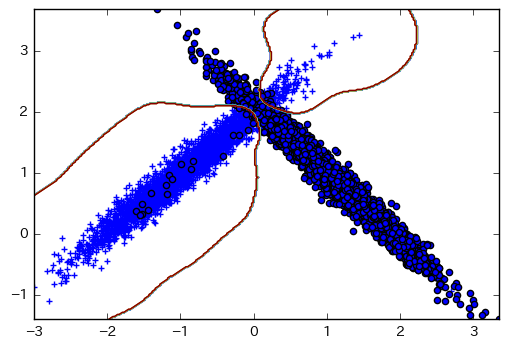

In [28]:
visualizeBoundary(X, y, estimator)

### 評価

**【課題５】** 得られた学習済みのモデルを使って、テスト集合に対するスコアを求めて下さい。

In [29]:
#Coursemale-02 Step6 QuestionNumber5 be1bb03ea26206d05613e0be4a0b0290
print("テスト集合に対するスコアは ", end="")
###############ここを穴埋めしてください###############
score_test = estimator.score(Xtest, ytest) * 100
######################################################
print(score_test,"%")

テスト集合に対するスコアは 97.1 %


左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [30]:
%%bash
./validation_client.py male-02 6 5 Step6_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.

